## Table of Content:
* [Introduction](#first-bullet)
* [Importing and EOD for Rate Data](#second-bullet)
* [Importing and EOD for Network Data](#third-bullet)
* [Importing and EOD for Benefit Data](#fourth-bullet)
* [Merging Data](#fifth-bullet)
* [Building the Model](#sixth-bullet)

## Importing and EOD for Rate Data <a class="anchor" id="second-bullet"></a>
First we will import the Rate_PUF and do some exploratory data analysis to understand what information we will need.

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# This allows plots to appear directly in the notebook.
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# Read Rate data into a DataFrame.
rate = pd.read_csv('/Users/Barbara/Desktop/GA Data Science/Rate_PUF.csv')
rate = rate.sample(frac=.1)
rate.head()

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,...,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
2428549,2017,MI,47638,SERFF,2016-08-23 04:37:23,20-3805292,2017-10-01,2017-12-31,47638MI0010001,Rating Area 10,...,21,29.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349846,2017,FL,43274,HIOS,2016-08-24 02:30:21,14-1917982,2017-01-01,2017-12-31,43274FL0010002,Rating Area 49,...,26,26.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299664,2017,FL,35783,HIOS,2017-01-19 02:20:17,61-1103898,2017-10-01,2017-12-31,35783FL1030052,Rating Area 53,...,34,408.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1034728,2017,NC,94482,HIOS,2016-07-01 08:12:23,95-6042390,2017-01-01,2017-12-31,94482NC0020005,Rating Area 14,...,33,31.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430236,2017,FL,93299,HIOS,2016-08-23 02:28:31,45-2548158,2017-01-01,2017-12-31,93299FL0010001,Rating Area 28,...,57,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Look at number of rows and columns in Rates
rate.shape

(309876, 21)

In [4]:
#Look at column types in rates
rate.dtypes

BusinessYear                                   int64
StateCode                                     object
IssuerId                                       int64
SourceName                                    object
ImportDate                                    object
FederalTIN                                    object
RateEffectiveDate                             object
RateExpirationDate                            object
PlanId                                        object
RatingAreaId                                  object
Tobacco                                       object
Age                                           object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            float64
PrimarySubscriberAndThreeOrMoreDependents    float64
CoupleAndOneDependent                        f

In [5]:
#Look at top, frequency for strings and min, max and mean for all columns in rate
rate.describe(include='all')

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,...,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,309876.0,309876,309876.000000,309876,309876,309876,309876,309876,309876,309876,...,309876,309876.000000,65092.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
unique,NaN,39,NaN,3,109,226,4,5,6589,67,...,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,FL,NaN,HIOS,2016-07-01 08:12:23,47-0397286,2017-01-01,2017-12-31,98534FL0240001,Rating Area 1,...,65 and over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,43230,NaN,194022,27080,22376,201929,202153,1303,23736,...,6859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2017.0,NaN,53486.753004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,330.375192,617.238225,54.190643,62.605965,67.666082,71.847719,88.149181,92.323743,96.479006
std,0.0,NaN,28390.940401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,639.596572,333.830441,35.397971,41.712440,45.112398,51.047894,68.478807,70.536449,74.732601
min,2017.0,NaN,10046.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,77.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.0,NaN,29276.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,25.160000,375.950000,27.472500,29.050000,29.050000,29.050000,29.050000,29.050000,29.050000
50%,2017.0,NaN,47665.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,208.195000,520.345000,37.055000,50.730000,54.060000,54.060000,70.430000,75.415000,77.625000
75%,2017.0,NaN,83761.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,491.190000,782.610000,89.600000,99.930000,111.807500,116.630000,151.430000,162.010000,170.375000


I noticed that Individual rate min is 0 - are some insurance free? or should these 0s be null instead?

In [6]:
#check which columns have nulls in Rate
rate.isnull().sum()

BusinessYear                                      0
StateCode                                         0
IssuerId                                          0
SourceName                                        0
ImportDate                                        0
FederalTIN                                        0
RateEffectiveDate                                 0
RateExpirationDate                                0
PlanId                                            0
RatingAreaId                                      0
Tobacco                                           0
Age                                               0
IndividualRate                                    0
IndividualTobaccoRate                        244784
Couple                                       309534
PrimarySubscriberAndOneDependent             309534
PrimarySubscriberAndTwoDependents            309534
PrimarySubscriberAndThreeOrMoreDependents    309534
CoupleAndOneDependent                        309534
CoupleAndTwo

This means that the 0s in IndividualRate are truly zero and not null. However, there are a lot of null on the other rows. Since we can't make up the data for these rates, they are probably not applicable for the specific plans. We can drop the columns with null values. Alternatively we don't have to use these rates and ony use the individual rate.

In [7]:
#Look at the number of plans per state
rate.loc[:,'StateCode'].value_counts()

FL    43230
WI    31886
MI    26686
OH    25677
TX    21450
SC    20948
GA    16631
IN    14174
IL    12756
VA    11306
NC    11063
PA     6960
NJ     5645
AL     4331
OK     4325
MO     4313
WV     4214
LA     4205
TN     4036
MT     3991
IA     3915
KY     3458
ME     2729
AZ     2684
KS     2380
AK     2346
ND     2190
SD     1922
OR     1655
AR     1349
UT     1176
NE     1120
MS     1103
NV     1101
WY      923
NM      807
NH      518
DE      474
HI      199
Name: StateCode, dtype: int64

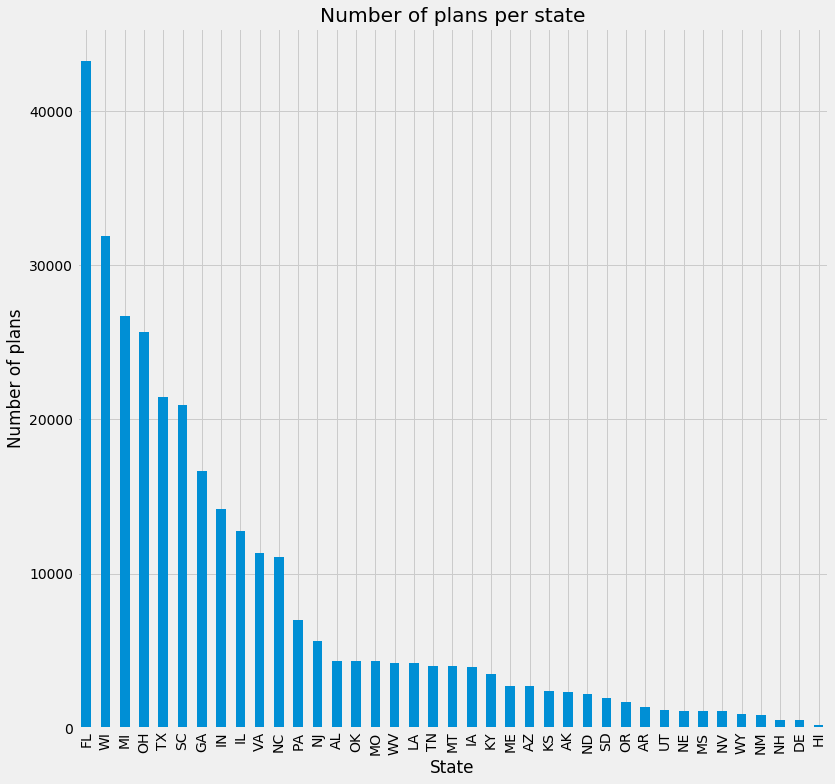

In [8]:
#visualise the number of plans by state
rate.loc[:,'StateCode'].value_counts().plot(kind='bar',figsize=(12,12));
plt.xlabel('State');
plt.ylabel('Number of plans');
plt.title('Number of plans per state');

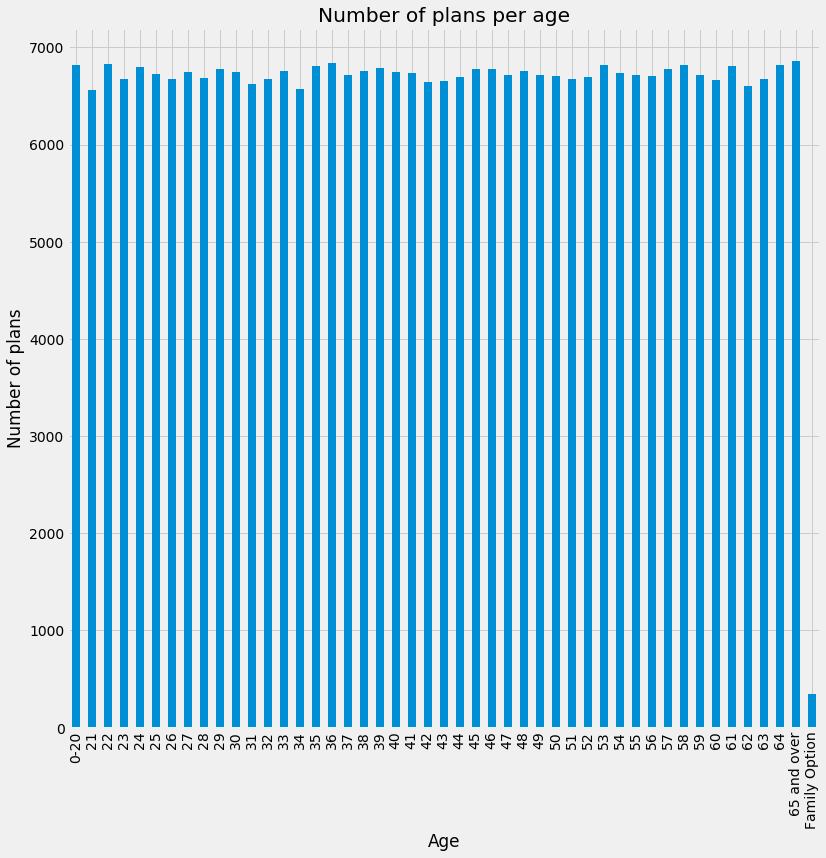

In [9]:
#based on above graph we can see that Florida has the most plans on this sample Rate data set
#Look athe number of plans per age
rate.loc[:, 'Age'].value_counts().sort_index().plot(kind='bar', figsize=(12,12));\
plt.xlabel('Age');
plt.ylabel('Number of plans');
plt.title('Number of plans per age');

## Importing and EOD for Network Data <a class="anchor" id="third-bullet"></a>
Next we will import the Network and do some exploratory data analysis to understand what information we will need.

In [10]:
#Looking at graph above, we can see that it's almost distribute evenly across all ages except for Family option. 
# Since we are not focusing on age, we could drop records with Age = Family Option when we do the analysis
# Read Rate data into a DataFrame.
network = pd.read_csv('/Users/Barbara/Desktop/GA Data Science/Network_PUF.csv')
network.head()

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,NetworkName,NetworkId,NetworkURL,MarketCoverage,DentalOnlyPlan
0,2017,NC,56964,HIOS,2016-06-28 02:39:00,Ameritas PPO Dental Network,NCN001,www.standard.com,NaN,NaN
1,2017,NC,73943,HIOS,2016-08-24 02:30:21,North Carolina HMO Network,NCN001,http://www.cigna.com/ifp-providers,NaN,NaN
2,2017,NC,76994,HIOS,2016-06-28 02:39:00,Ameritas PPO Dental Network,NCN001,www.reliancestandard.com,NaN,NaN
3,2017,NC,82612,HIOS,2016-08-16 03:04:39,DenteMax,NCN001,https://www.truassure.com/find-a-provider,NaN,NaN
4,2017,NC,94482,HIOS,2016-07-01 08:12:23,BEST Life and Health National Network,NCN001,http://www.bestlife.com/Provider_Search/,NaN,NaN


In [11]:
#Look at number of rows and columns in network data set. We didn't need to do a sample since the data set wasn't large
network.shape

(939, 10)

In [12]:
#Look at column type in network
network.dtypes

BusinessYear       int64
StateCode         object
IssuerId           int64
SourceName        object
ImportDate        object
NetworkName       object
NetworkId         object
NetworkURL        object
MarketCoverage    object
DentalOnlyPlan    object
dtype: object

In [13]:
#Look at  top, frequency for strings and min, max and mean for all columns in Network
network.describe(include='all')

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,NetworkName,NetworkId,NetworkURL,MarketCoverage,DentalOnlyPlan
count,939.0,939,939.000000,939,939,939,939,939,542,542
unique,NaN,39,NaN,3,109,440,203,409,2,3
top,NaN,OH,NaN,SERFF,2016-08-20 11:23:22,Ameritas PPO Dental Network,MIN001,http://www.bestlife.com/Provider_Search/,Individual,Yes
freq,NaN,61,NaN,519,77,80,36,42,316,282
mean,2017.0,NaN,53810.424920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,NaN,26569.803258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2017.0,NaN,10046.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2017.0,NaN,30751.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.0,NaN,52391.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2017.0,NaN,76173.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
network.isnull().sum()
#Will need to confirm if MarketCoverage and DentalOnlyPlan are truly nulls.
#Alternatively we could drop this columns since we don't need them for the model

BusinessYear        0
StateCode           0
IssuerId            0
SourceName          0
ImportDate          0
NetworkName         0
NetworkId           0
NetworkURL          0
MarketCoverage    397
DentalOnlyPlan    397
dtype: int64

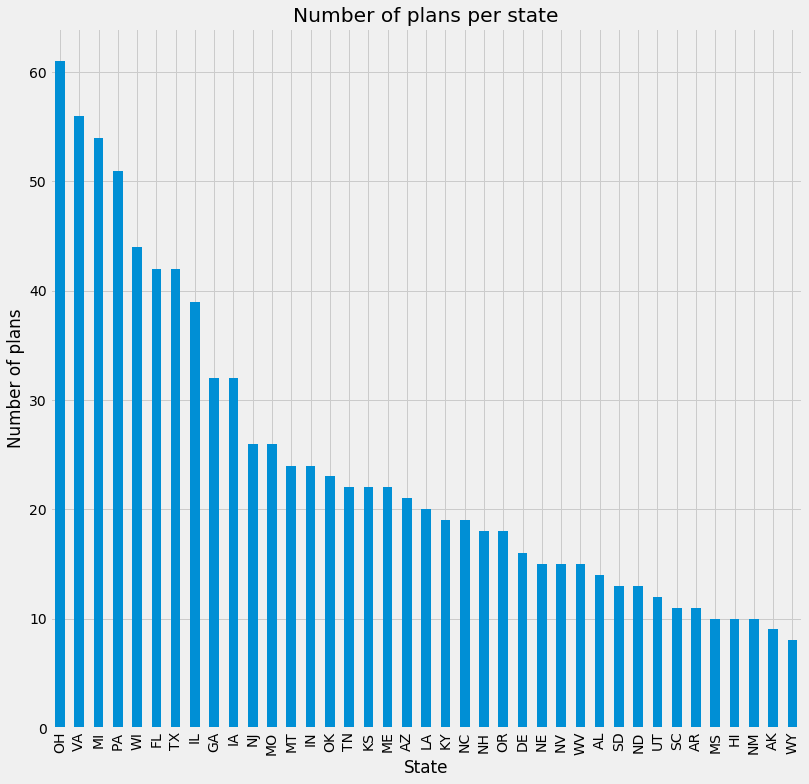

In [15]:
#visualise the number of networks by state
network.loc[:,'StateCode'].value_counts().plot(kind='bar',figsize=(12,12));
plt.xlabel('State');
plt.ylabel('Number of plans');
plt.title('Number of plans per state');

## Importing and EOD for Benefits Data <a class="anchor" id="fourth-bullet"></a>
Next we will import the Benefits_Cost_Sharing_PUF and do some exploratory data analysis to understand what information we will need.

In [16]:
# Read Benefits data into a DataFrame.
benefits = pd.read_csv('/Users/Barbara/Desktop/GA Data Science/Benefits_Cost_Sharing_PUF.csv', encoding='latin_1', dtype={'CopayInnTier2': object, 'CoinsInnTier2': object, 'Exclusions': object})
benefits = benefits.sample(frac=.1)
benefits.head()

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,StandardComponentId,PlanId,BenefitName,CopayInnTier1,CopayInnTier2,...,IsEHB,IsCovered,QuantLimitOnSvc,LimitQty,LimitUnit,Exclusions,Explanation,EHBVarReason,IsExclFromInnMOOP,IsExclFromOonMOOP
559993,2017,WI,38166,HIOS,2017-04-26 02:48:20,38166WI0170004,38166WI0170004-05,Routine Foot Care,NaN,NaN,...,NaN,Not Covered,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
876069,2017,KS,39520,SERFF,2016-11-16 22:15:47,39520KS0010005,39520KS0010005-02,Routine Dental Services (Adult),NaN,NaN,...,NaN,Not Covered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616351,2017,WI,86584,HIOS,2017-01-21 03:35:28,86584WI0030003,86584WI0030003-01,Emergency Room Services,$250.00,NaN,...,Yes,Covered,No,NaN,NaN,NaN,Services provided by a non-participating provi...,NaN,No,No
1043467,2017,NV,33670,SERFF,2017-01-19 20:15:29,33670NV1050005,33670NV1050005-01,Radiation,Not Applicable,Not Applicable,...,Yes,Covered,NaN,NaN,NaN,NaN,NaN,NaN,No,No
369115,2017,TX,29418,HIOS,2016-10-18 03:04:46,29418TX0150001,29418TX0150001-03,Mental/Behavioral Health Inpatient Services,Not Applicable,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,NaN,NaN,No,No


In [17]:
#look at number of rows and columns in benefits
benefits.shape

(132428, 24)

In [18]:
#look at column types in benefits
benefits.dtypes

BusinessYear             int64
StateCode               object
IssuerId                 int64
SourceName              object
ImportDate              object
StandardComponentId     object
PlanId                  object
BenefitName             object
CopayInnTier1           object
CopayInnTier2           object
CopayOutofNet           object
CoinsInnTier1           object
CoinsInnTier2           object
CoinsOutofNet           object
IsEHB                   object
IsCovered               object
QuantLimitOnSvc         object
LimitQty               float64
LimitUnit               object
Exclusions              object
Explanation             object
EHBVarReason            object
IsExclFromInnMOOP       object
IsExclFromOonMOOP       object
dtype: object

In [19]:
#Look at  top, frequency for strings and min, max and mean for all columns in benefits
benefits.describe(include='all')

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,StandardComponentId,PlanId,BenefitName,CopayInnTier1,CopayInnTier2,...,IsEHB,IsCovered,QuantLimitOnSvc,LimitQty,LimitUnit,Exclusions,Explanation,EHBVarReason,IsExclFromInnMOOP,IsExclFromOonMOOP
count,132428.0,132428,132428.000000,132428,132428,132428,132428,132428,102953,29903,...,98894,127752,37935,18285.000000,18285,10470,40204,39844,111920,111929
unique,NaN,39,NaN,3,108,5992,20272,249,365,96,...,1,2,2,NaN,58,564,2572,7,2,3
top,NaN,TX,NaN,HIOS,2017-01-25 02:20:17,61163NH0450001,86584WI0010001-03,Major Dental Care - Child,Not Applicable,Not Applicable,...,Yes,Covered,No,NaN,Visit(s) per Year,Coverage for certain agents or medication cate...,Cost share is driven by provider/setting.,Substantially Equal,No,No
freq,NaN,16872,NaN,66948,13522,74,18,2166,60202,24314,...,98894,102953,19987,NaN,6698,1579,871,21845,110636,94959
mean,2017.0,NaN,48701.190134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,177.992015,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,NaN,25362.921968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1488.451824,NaN,NaN,NaN,NaN,NaN,NaN
min,2017.0,NaN,10046.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2017.0,NaN,30751.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.0,NaN,37576.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2017.0,NaN,70194.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Look at null values in benefits. We won't need those columns that have nulls so we can drop them when we merge all three DF
benefits.isnull().sum()

BusinessYear                0
StateCode                   0
IssuerId                    0
SourceName                  0
ImportDate                  0
StandardComponentId         0
PlanId                      0
BenefitName                 0
CopayInnTier1           29475
CopayInnTier2          102525
CopayOutofNet           29475
CoinsInnTier1           29475
CoinsInnTier2          102525
CoinsOutofNet           29475
IsEHB                   33534
IsCovered                4676
QuantLimitOnSvc         94493
LimitQty               114143
LimitUnit              114143
Exclusions             121958
Explanation             92224
EHBVarReason            92584
IsExclFromInnMOOP       20508
IsExclFromOonMOOP       20499
dtype: int64

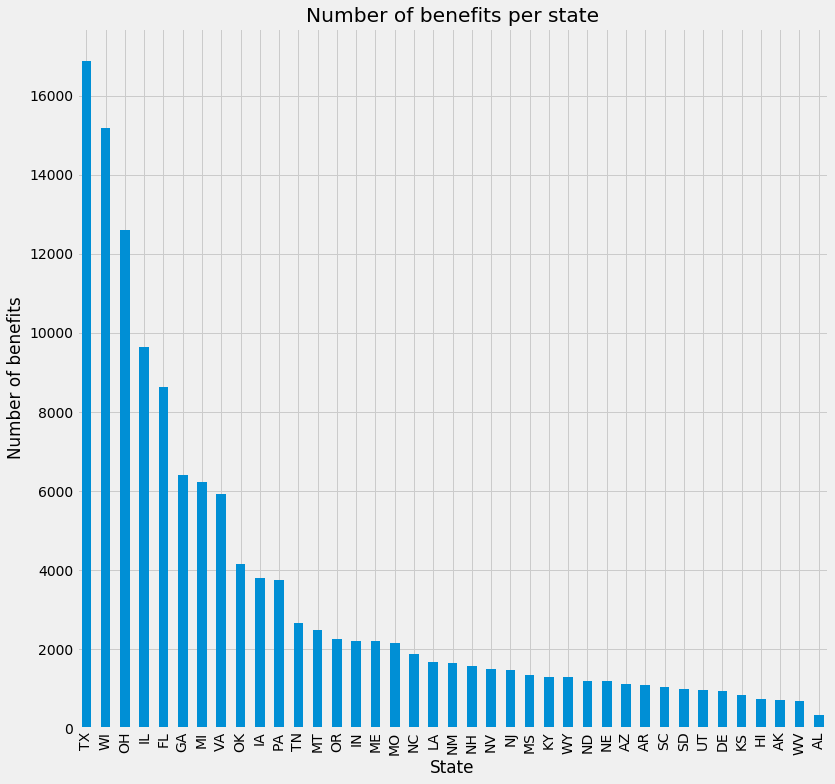

In [21]:
#visualise the number of networks by state
benefits.loc[:,'StateCode'].value_counts().plot(kind='bar',figsize=(12,12));
plt.xlabel('State');
plt.ylabel('Number of benefits');
plt.title('Number of benefits per state');

In [22]:
#count the number of benefits per Plan Id (after some invistigation because I couldn't merge Plan with Rates, I found that 
#'StandardComponendId' is actually the 'PlanId')
benefits_count = benefits.loc[:,'StandardComponentId'].value_counts().to_frame('benefits_count')
benefits_count.index.names = ['StandardComponentId']
#make'PlanId' a column in the new dataframe so it can be joined later to rates
benefits_count['PlanId'] = benefits_count.index
benefits_count

,benefits_count,PlanId
StandardComponentId,,
61163NH0450001,74,61163NH0450001
96667ME0260016,73,96667ME0260016
36096IL0990112,73,36096IL0990112
56503FL2560002,70,56503FL2560002
77606NJ0040001,70,77606NJ0040001
99248TN0060013,69,99248TN0060013
86584WI0010002,69,86584WI0010002
58288IL0380028,69,58288IL0380028
36194FL0040007,69,36194FL0040007


In [23]:
#same process with network except the count should be at the issuer level
network_count = network.loc[:,'IssuerId'].value_counts().to_frame('network_count')
network_count.index.names = ['IssuerId']
#create issuerid as a column in the dataframe
network_count['IssuerId'] = network_count.index
network_count

,network_count,IssuerId
IssuerId,,
18973,10,18973
36096,10,36096
99969,9,99969
48396,8,48396
36239,7,36239
18350,7,18350
16322,7,16322
87571,7,87571
93332,6,93332


In [24]:
#obtain columns wanted from rate
individualRate = rate.loc[:,['PlanId','IssuerId', 'IndividualRate','StateCode','RatingAreaId', 'Tobacco', 'Age']]
individualRate.head()

,PlanId,IssuerId,IndividualRate,StateCode,RatingAreaId,Tobacco,Age
2428549,47638MI0010001,47638,29.56,MI,Rating Area 10,No Preference,21
349846,43274FL0010002,43274,26.00,FL,Rating Area 49,No Preference,26
299664,35783FL1030052,35783,408.15,FL,Rating Area 53,No Preference,34
1034728,94482NC0020005,94482,31.91,NC,Rating Area 14,No Preference,33
430236,93299FL0010001,93299,0.00,FL,Rating Area 28,No Preference,57


In [25]:
#make sure there are no nulls
individualRate.isnull().sum()

PlanId            0
IssuerId          0
IndividualRate    0
StateCode         0
RatingAreaId      0
Tobacco           0
Age               0
dtype: int64

## Merging Data <a class="anchor" id="fifth-bullet"></a>
Now we merge the clean rate, benefit and network dataframes.

In [26]:
#next we can merge our data
combined_data = pd.merge(individualRate, benefits_count)
combined_data = pd.merge(combined_data, network_count)
combined_data.head()

,PlanId,IssuerId,IndividualRate,StateCode,RatingAreaId,Tobacco,Age,benefits_count,network_count
0,47638MI0010001,47638,29.56,MI,Rating Area 10,No Preference,21,1,1
1,47638MI0010001,47638,30.45,MI,Rating Area 6,No Preference,22,1,1
2,47638MI0010001,47638,29.78,MI,Rating Area 16,No Preference,46,1,1
3,47638MI0010001,47638,32.45,MI,Rating Area 12,No Preference,61,1,1
4,47638MI0010001,47638,32.36,MI,Rating Area 12,No Preference,0-20,1,1


In [27]:
#make sure there are no nulls
combined_data.isnull().sum()

PlanId            0
IssuerId          0
IndividualRate    0
StateCode         0
RatingAreaId      0
Tobacco           0
Age               0
benefits_count    0
network_count     0
dtype: int64

In [28]:
combined_data.shape

(255903, 9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029895C83B70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000029895D67E80>]], dtype=object)

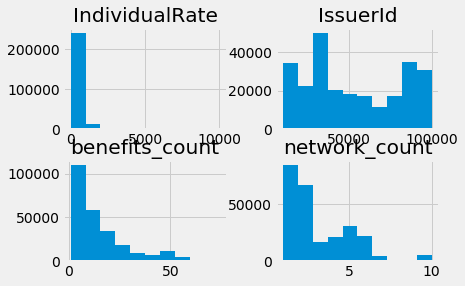

In [29]:
combined_data.hist()

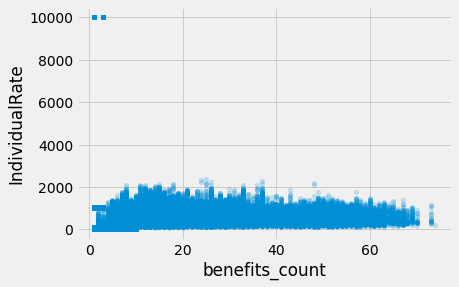

In [36]:
# Are number of benefits and number of networks correlated?
combined_data.plot(kind='scatter', x='benefits_count', y='IndividualRate', alpha=0.2);

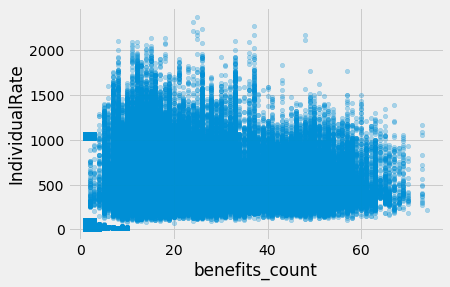

In [45]:
#since they were some outliers, I wanted to see how the rest of the data looks like.
clean_combined_data = combined_data.loc[combined_data.loc[:,'IndividualRate']<3000,:]
clean_combined_data.plot(kind='scatter', x='benefits_count', y='IndividualRate', alpha=0.3);

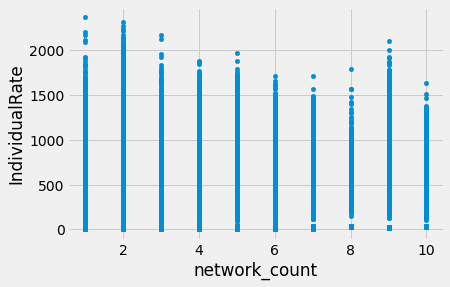

In [42]:
# Are number of network and number of networks correlated?
clean_combined_data.plot(kind='scatter', x='network_count', y='IndividualRate');

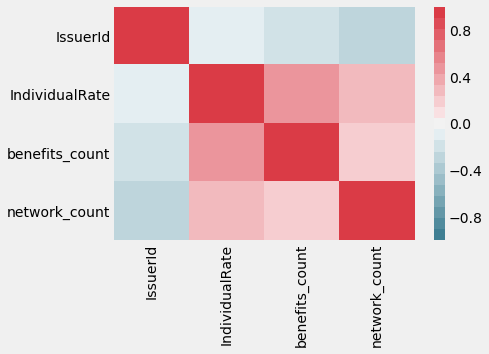

In [44]:
sns.heatmap(clean_combined_data.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220,10,n=21));

## Building the Model <a class="anchor" id="sixth-bullet"></a>
Now that we have one final data set to work with we can build our model

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, feature_cols):
    X = df.loc[:,feature_cols]
    y = df.loc[:,'IndividualRate']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [141]:
#Comparing different sets of features. It loooks like network and benefits combined is the best
print(train_test_rmse(clean_combined_data, ['benefits_count']))
print(train_test_rmse(clean_combined_data, ['network_count']))
print(train_test_rmse(clean_combined_data, ['network_count','benefits_count']))

299.863979295
326.384137937
293.23823767


Calculate the NULL RMSE to use it as a baseline for the RMSE calculated above

In [137]:
X = clean_combined_data.loc[:,['network_count','benefits_count']]
y = clean_combined_data.loc[:,'IndividualRate']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
null_pred = np.ones(y_test.shape)
null_pred *= y_train.mean()
print(np.sqrt(metrics.mean_squared_error(y_test, null_pred)))

338.759887864


In [68]:
print(linreg.intercept_)
print(linreg.coef_)

125.20742878
[ 28.29733729  10.03900606]


In [106]:
X = clean_combined_data.loc[:,['network_count','benefits_count']]
clean_combined_data.loc[:,'rate_predictions']= linreg.predict(X)

C:\Users\Barbara\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Barbara\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [115]:
clean_combined_data.shape

(255372, 10)

In [116]:
clean_combined_data.head()

,PlanId,IssuerId,IndividualRate,StateCode,RatingAreaId,Tobacco,Age,benefits_count,network_count,rate_predictions
0,47638MI0010001,47638,29.56,MI,Rating Area 10,No Preference,21,1,1,163.543772
1,47638MI0010001,47638,30.45,MI,Rating Area 6,No Preference,22,1,1,163.543772
2,47638MI0010001,47638,29.78,MI,Rating Area 16,No Preference,46,1,1,163.543772
3,47638MI0010001,47638,32.45,MI,Rating Area 12,No Preference,61,1,1,163.543772
4,47638MI0010001,47638,32.36,MI,Rating Area 12,No Preference,0-20,1,1,163.543772
